### CodSoft_*TASK-3: Credit Card Fraud Detection*

**Problem Statement:** 
- Build a machine learning model to identify fraudulent credit card transactions.
- Preprocess and normalize the transaction data, handle class imbalance issues, and split the dataset into training and testing sets.
- Train a classification algorithm, such as logistic regression or random forests, to classify transactions as fraudulent or genuine.
- Evaluate the model's performance using metrics like precision, recall, and F1-score, and consider techniques like oversampling or undersampling for improving results.

**Dataset:** https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

### Importing the Libraries

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
sns.set()

In [57]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_curve, auc
from sklearn.preprocessing import StandardScaler

### Importing the Dataset

In [58]:
df = pd.read_csv('credit card_dataset.csv')

In [59]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [60]:
df.shape

(284807, 31)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [62]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

### EDA

**Checking the Missing Values**

In [63]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

There's no missing value.

**Statistical Analysis**

In [64]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


**Visualization**

In [66]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

**Distribution of Fraudulent and Non-Fraudulent Transactions**

- Non-Fraudulent: Class-0
- Fraudulent: Class-1

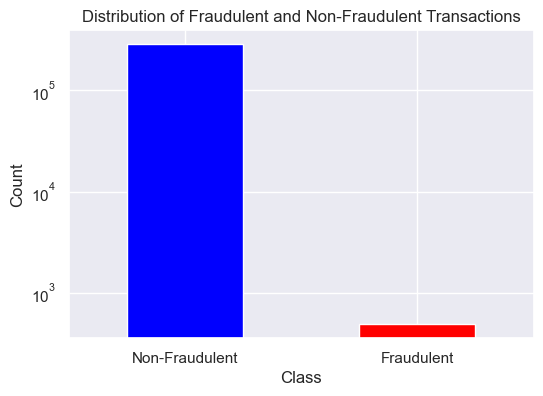

In [69]:
class_counts = df['Class'].value_counts()

plt.figure(figsize=(6, 4))
class_counts.plot(kind='bar', color=['blue', 'red'])
plt.title('Distribution of Fraudulent and Non-Fraudulent Transactions')
plt.xlabel('Class')
plt.ylabel('Count')
plt.yscale('log')
plt.xticks(ticks=[0, 1], labels=['Non-Fraudulent', 'Fraudulent'], rotation=0)
plt.show()

**Transaction Amount by Class**

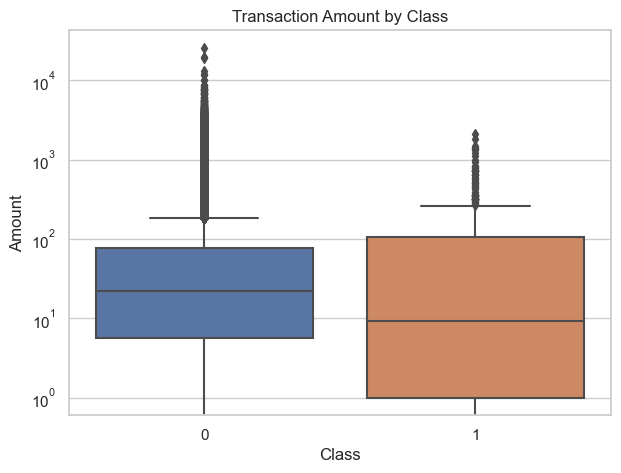

In [71]:
sns.set(style="whitegrid")

plt.figure(figsize=(7, 5))
sns.boxplot(x='Class', y='Amount', data=df)
plt.yscale('log')
plt.title('Transaction Amount by Class')
plt.show()

**Correlation Heatmap**

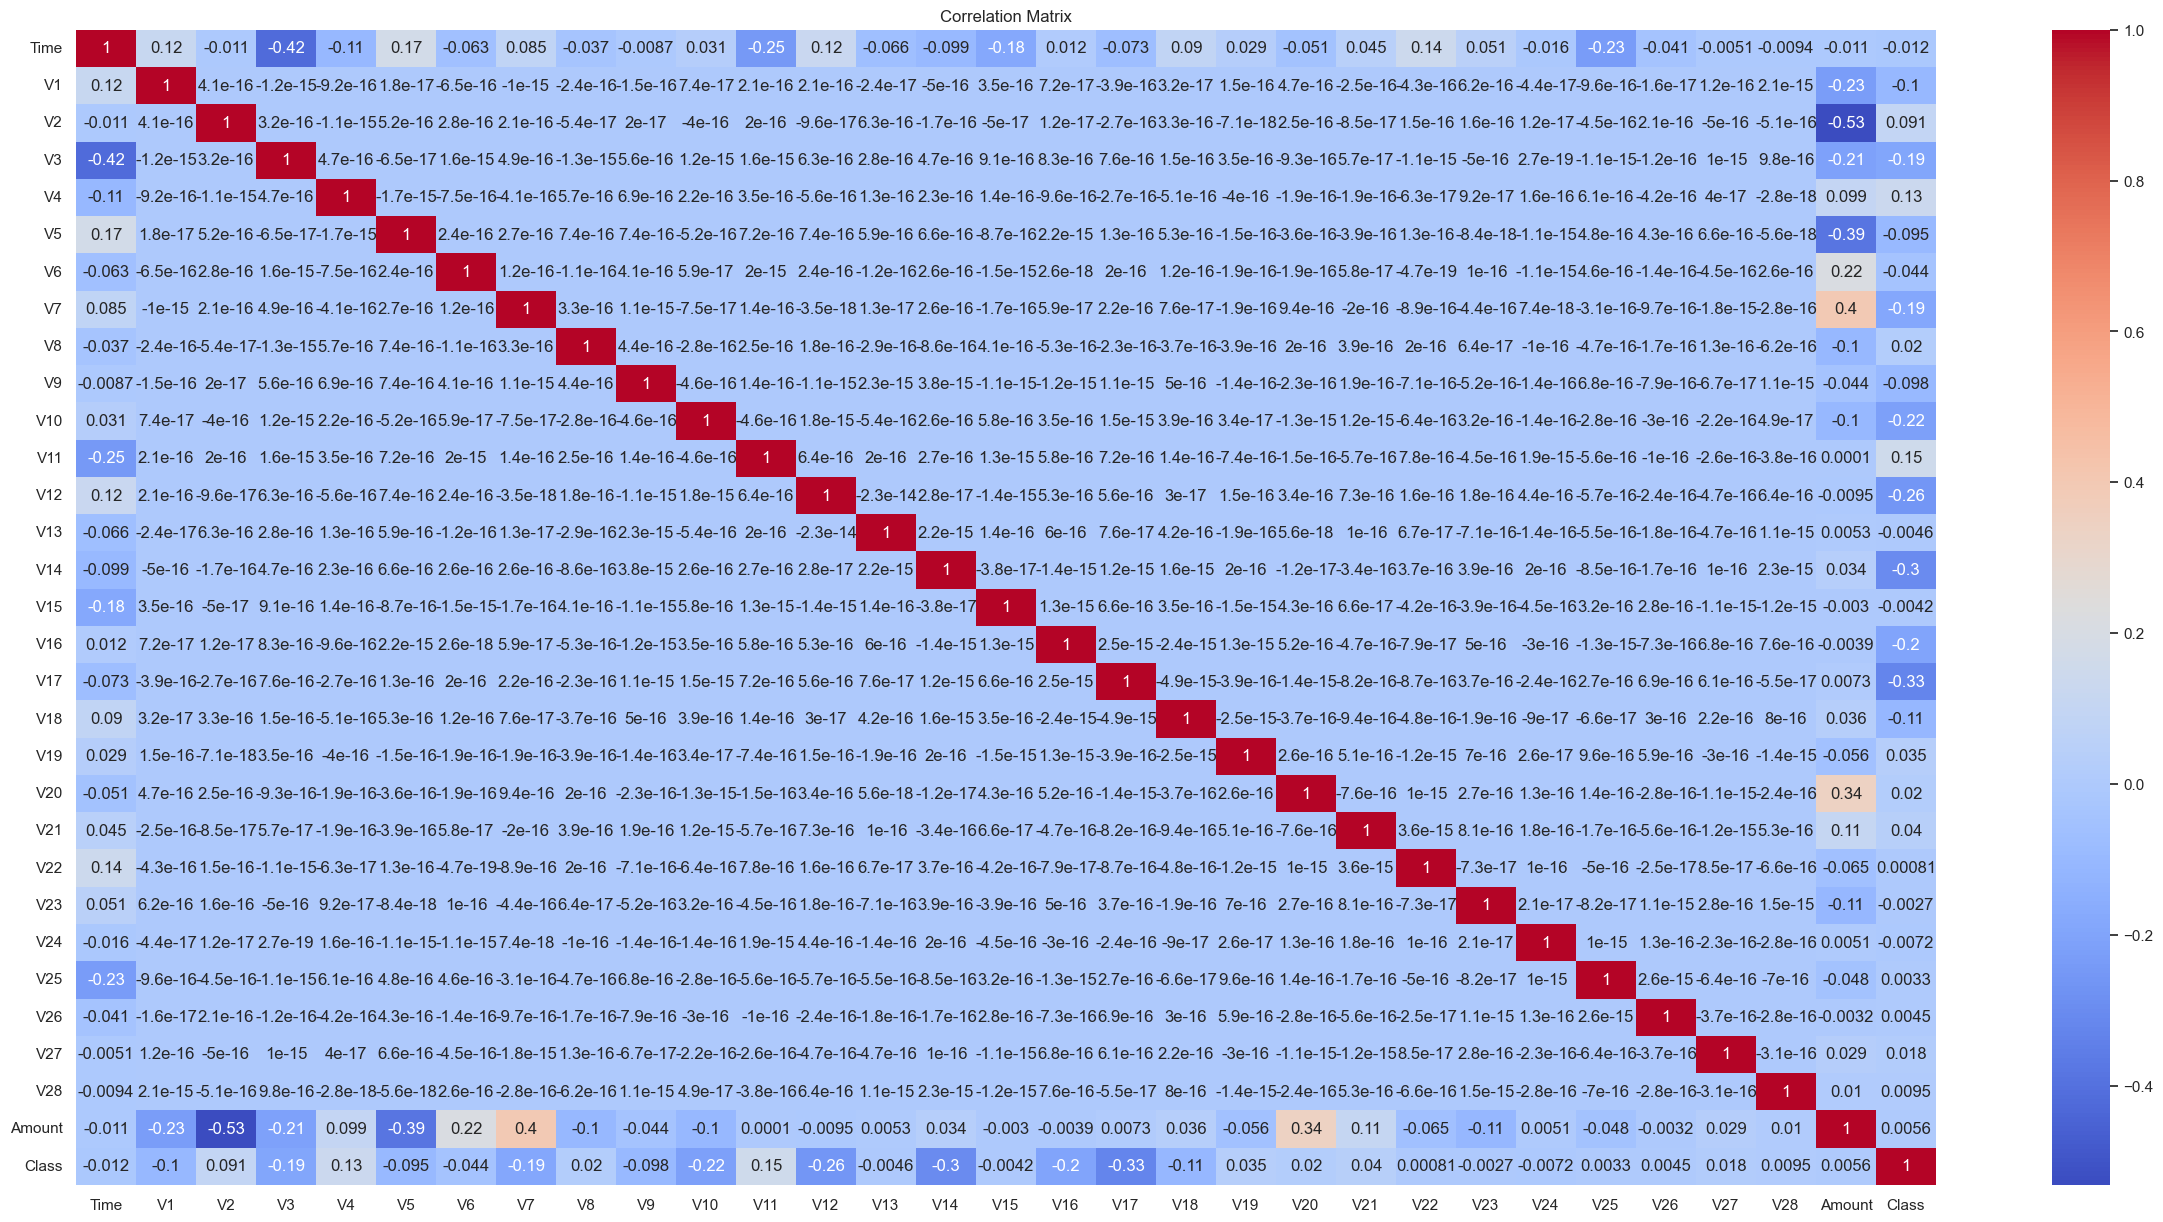

In [73]:
plt.figure(figsize=(30, 15))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Feature Selection

In [74]:
x = df.drop('Class', axis=1)
y = df['Class']

### Splitting the Data

In [75]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### Implementing ML Model

**Training a Logistic Regression Model**

In [76]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

**Making Predictions**

In [77]:
y_pred = model.predict(x_test)

### Accuracy

In [78]:
accuracy_score(y_pred,y_test)

0.9986306660580738

### Evaluating the Model

**Different Performance Metrics: Precision, Recall, and F1-Score**

In [79]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[56829    35]
 [   43    55]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.61      0.56      0.59        98

    accuracy                           1.00     56962
   macro avg       0.81      0.78      0.79     56962
weighted avg       1.00      1.00      1.00     56962



**Precision-Recall Curve**

In [80]:
# Calculation

precision, recall, _ = precision_recall_curve(y_test, y_pred)
auc_score = auc(recall, precision)

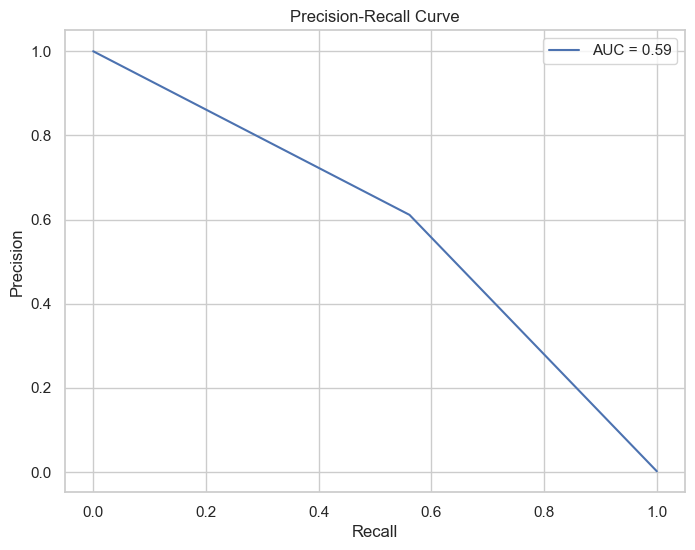

In [82]:
# Plotting the Precision-Recall Curve

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'AUC = {auc_score:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

### Making a Prediction System

In [84]:
def pred(data):
    data = np.asarray(data).reshape(1,-1)
    predd = model.predict(data)
    if predd == 0:
        print("it's a Normal Card")
    else:
        print("it's a Scam Card")

**Example: Normal Card Prediction**

In [86]:
pred([300, 0.5, -0.2, 0.8, -1.5, 0.6, 0.3, 0.7, -0.5, 0.2, -0.1, 0.9, -1.0, 1.2, -0.3, 0.5, -0.6, 0.7, -0.8, 
      0.4, -0.2, 0.2, -0.1, 0.3, -0.4, 0.1, -0.2, 0.5, -0.1, 100.0])

it's a Normal Card


**Example: Scam Card Prediction**

In [89]:
pred([4462, -2.30334956758553, 1.759247460267, -0.359744743330052, 2.33024305053917, -0.821628328375422, -0.0757875706194599, 
      0.562319782266954, -0.399146578487216, -0.238253367661746, -1.52541162656194, 2.03291215755072, -6.56012429505962, 
      0.0229373234890961, -1.47010153611197, -0.698826068579047, -2.28219382856251, -4.78183085597533, -2.61566494476124, 
      -1.33444106667307, -0.430021867171611, -0.294166317554753, -0.932391057274991, 0.172726295799422, -0.0873295379700724, 
      -0.156114264651172, -0.542627889040196, 0.0395659889264757, -0.153028796529788, 239.93]) 

it's a Scam Card
